# Reconstrucr Image Using Singular-Value Decomposition Approach 

In [3]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import astropy.io.fits as fits, time

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load Primary Beam Model

In [4]:
#
def loadbeam(path, antnum=1):
    
    XX_re = fits.open('%s' %os.path.join(path, 'ant%iGxRe.fits' %antnum))[0].data
    XX_im = fits.open('%s' %os.path.join(path, 'ant%iGxIm.fits' %antnum))[0].data
    XY_re = fits.open('%s' %os.path.join(path, 'ant%iGyRe.fits' %antnum))[0].data
    XY_im = fits.open('%s' %os.path.join(path, 'ant%iGyIm.fits' %antnum))[0].data
    YX_re = fits.open('%s' %os.path.join(path, 'ant%iDxRe.fits' %antnum))[0].data
    YX_im = fits.open('%s' %os.path.join(path, 'ant%iDxIm.fits' %antnum))[0].data
    YY_re = fits.open('%s' %os.path.join(path, 'ant%iDyRe.fits' %antnum))[0].data
    YY_im = fits.open('%s' %os.path.join(path, 'ant%iDyIm.fits' %antnum))[0].data
    
    emap = []
    emap.append([XX_re + 1j*XX_im, XY_re + 1j*XY_im])  
    emap.append([YX_re + 1j*YX_im, YY_re + 1j*YY_im])
    
    s = np.array(emap)  

    s = np.swapaxes(s, axis1=2, axis2=0)    
    
    return  s 

path = '/home/tan/Documents/GSSTI/holog'

gdata = loadbeam(path, antnum=6)
#

In [10]:
gdata.shape

(20, 2, 2, 256, 256)

### Reconstruct Beam from SVD

In [5]:
import sys
sys.path.insert(0, '/home/tan/Documents/GSSTI/JGSA/')

import primary_beam_denoising_pipeline as pb

mse, recons, weights = [], [], []
thresh = range(1,5)
K = pb.Singular_Value_Decompostion(gdata)
for i,ii in enumerate(thresh):
    reco, err, w = K.svdrecon(thresh=ii)
    recons.append(reco)
    mse.append(err)
    weights.append(w)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0 0
0 1
1 0
1 1
-- Time taken = 0.03 minutes
0 0
0 1
1 0
1 1
-- Time taken = 0.03 minutes
0 0
0 1
1 0
1 1
-- Time taken = 0.04 minutes
0 0
0 1
1 0
1 1
-- Time taken = 0.03 minutes


### Visualise Original & Reconstructed Beams

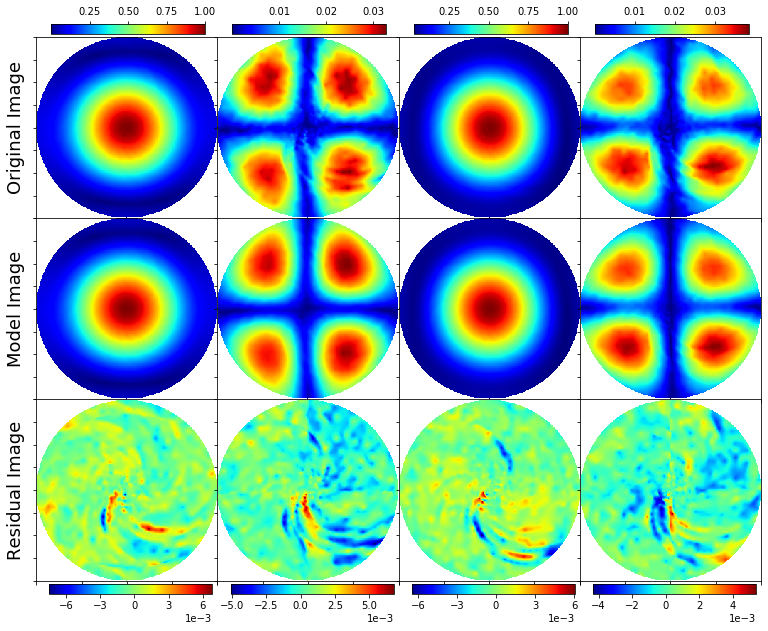

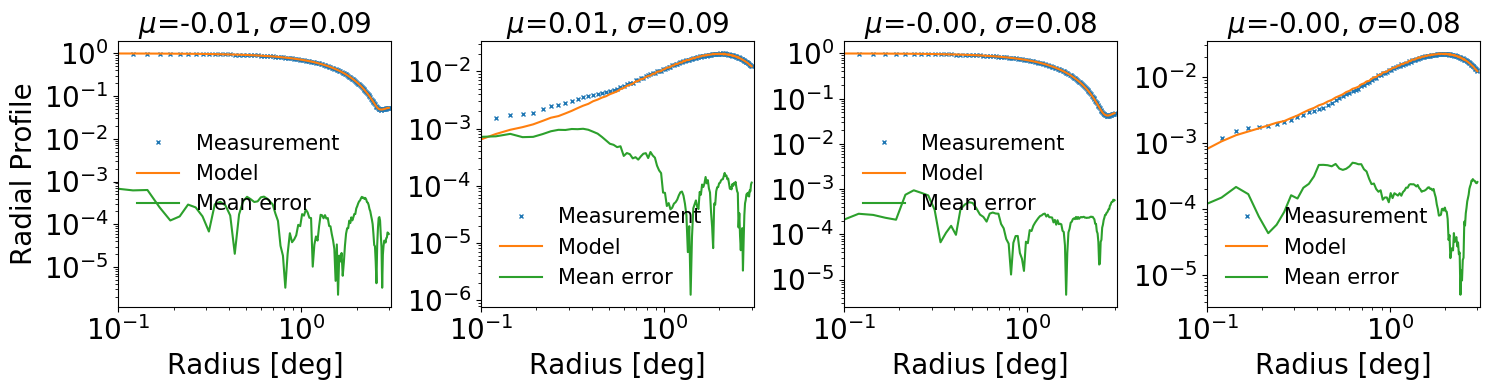

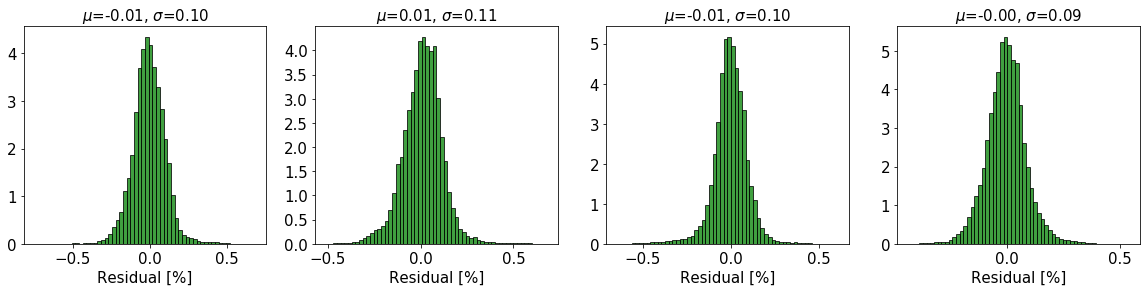

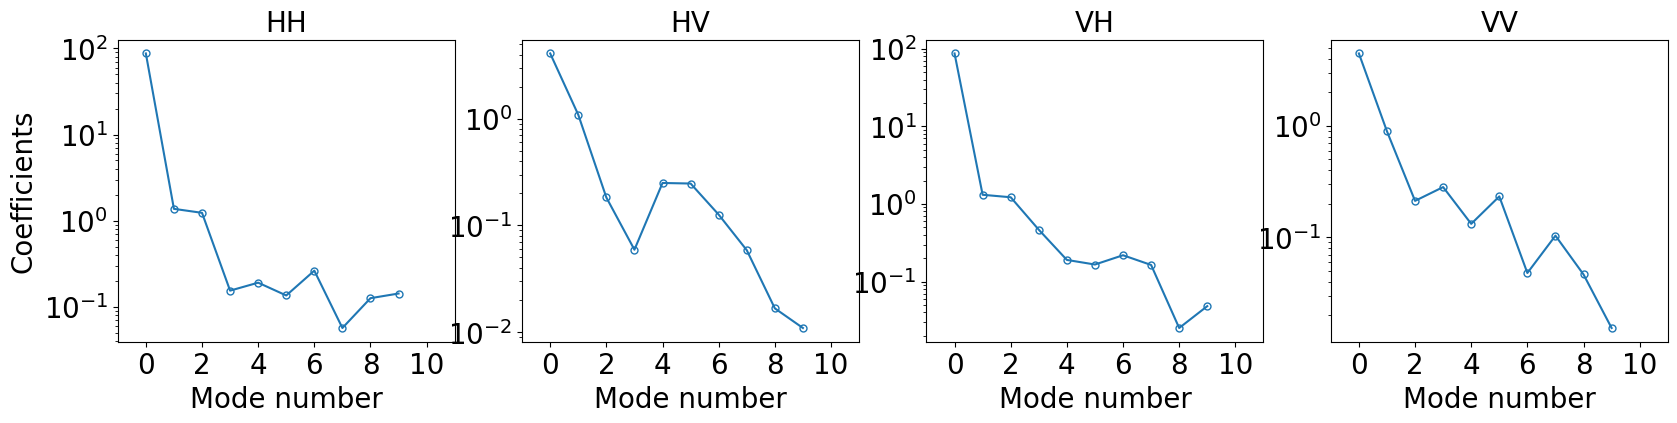

In [6]:
## Using 1 eigenvalue
ch = 10
egn =3
dat, mod = gdata[ch,:,:,:,:], recons[egn][ch,:,:,:,:]
coeffs = weights[0][:,:,:,:10]
# gof_plot(abs(dat), abs(mod), abs(coeffs[:,:,ch,:]), vrange=[-25,0, -30,-10], extent = [-1,1,-1,1])
from gof import *
gof_plot2(abs(np.nan_to_num(dat)), abs(mod), abs(coeffs[:,:,ch,:]), extent = [-1,1,-1,1])


In [62]:
def plot_1Dslice(jns_beam, beamsize=6.):
    """
    Generates 1D profile of Jones beams in (2,2,N,N) format
    ** jns_beam:: Jones beams
    ** beamsize:: image size in degrees
    return::
      * Left & right diagonal plots
      * Horizontal & vertical plots
    """
    shp = jns_beam.shape[-1]
    fig = plt.figure(1, figsize=(25,10), dpi=100)
    n = 1
    x = np.linspace(-beamsize/2.,beamsize/2.,shp)
    ax = fig.add_subplot(1,2, n)
    ax.plot(x,jns_beam[0,0,...].diagonal(), linestyle='-', marker='o', label='HH Ldiag')
    ax.plot(x,np.rot90(jns_beam[0,0,...]).diagonal(), linestyle='-', marker='o', label='HH Rdiag')
    ax.plot(x,jns_beam[0,0,...][jns_beam[0,0,...].shape[-1]//2,:], label='HH x-axis')
    print(True)
    ax.plot(x,jns_beam[0,0,...][:,jns_beam[0,0,...].shape[-1]//2], label='HH y-axis')
    #ax.plot(x,VV_re[1].diagonal(), label='VV')
#     print(True)
    ax.plot(x,jns_beam[1,1,...].diagonal(), linestyle='-', marker='o', label='VV Ldiag')
    ax.plot(x,np.rot90(jns_beam[1,1,...]).diagonal(), linestyle='-', marker='o', label='VV Rdiag')
    ax.plot(x,jns_beam[1,1,...][jns_beam[1,1,...].shape[-1]//2,:], label='VV x-axis')
    ax.plot(x,jns_beam[1,1,...][:,jns_beam[1,1,...].shape[-1]//2], label='VV y-axis')
    ax.set_xlabel(r'$\theta$ [deg]', fontsize=22)
    ax.set_ylabel(r'Normalised Radiation Pattern', fontsize=22)
    ax.set_title(r' Co-polar',fontsize=22)
    ax.legend(loc=0, fontsize=20)
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(25) 
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(25)
    plt.locator_params(axis='y', nbins=6)
    plt.locator_params(axis='x', nbins=5)
    
    n+=1
    

    ax = fig.add_subplot(1,2, n)
    ax.plot(x,jns_beam[0,1,...].diagonal(),linestyle='-', marker='o', label='HV Ldiag')
    ax.plot(x,np.rot90(jns_beam[0,1,...]).diagonal(), linestyle='-', marker='o', label='HV Rdiag')
    ax.plot(x,jns_beam[0,1,...][jns_beam[0,1,...].shape[-1]//2,:], label='HV x-axis')
    ax.plot(x,jns_beam[0,1,...][:,jns_beam[0,1,...].shape[-1]//2], label='HV y-axis')
#     ax.plot(x,VV_re[1].diagonal(), label='VV')
    ax.plot(x,jns_beam[1,0,...].diagonal(), linestyle='-', marker='o', label='VH Ldiag')
    ax.plot(x,np.rot90(jns_beam[1,0,...]).diagonal(), linestyle='-', marker='o', label='VH Rdiag')
    ax.plot(x,jns_beam[1,0,...][jns_beam[1,0,...].shape[-1]//2,:], label='VH x-axis')
    ax.plot(x,jns_beam[1,0,...][:,jns_beam[1,0,...].shape[-1]//2], label='VH y-axis')
    ax.set_xlabel(r'$\theta$ [deg]', fontsize=22)
    ax.set_ylabel(r'Normalised Radiation Pattern', fontsize=22)
    ax.set_title(r' Cross-polar',fontsize=22)
    ax.legend(loc=0, fontsize=20)
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(25) 
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(25)
    plt.locator_params(axis='y', nbins=6)
    plt.locator_params(axis='x', nbins=5)
        
    plt.tight_layout()
    
    return None 

True


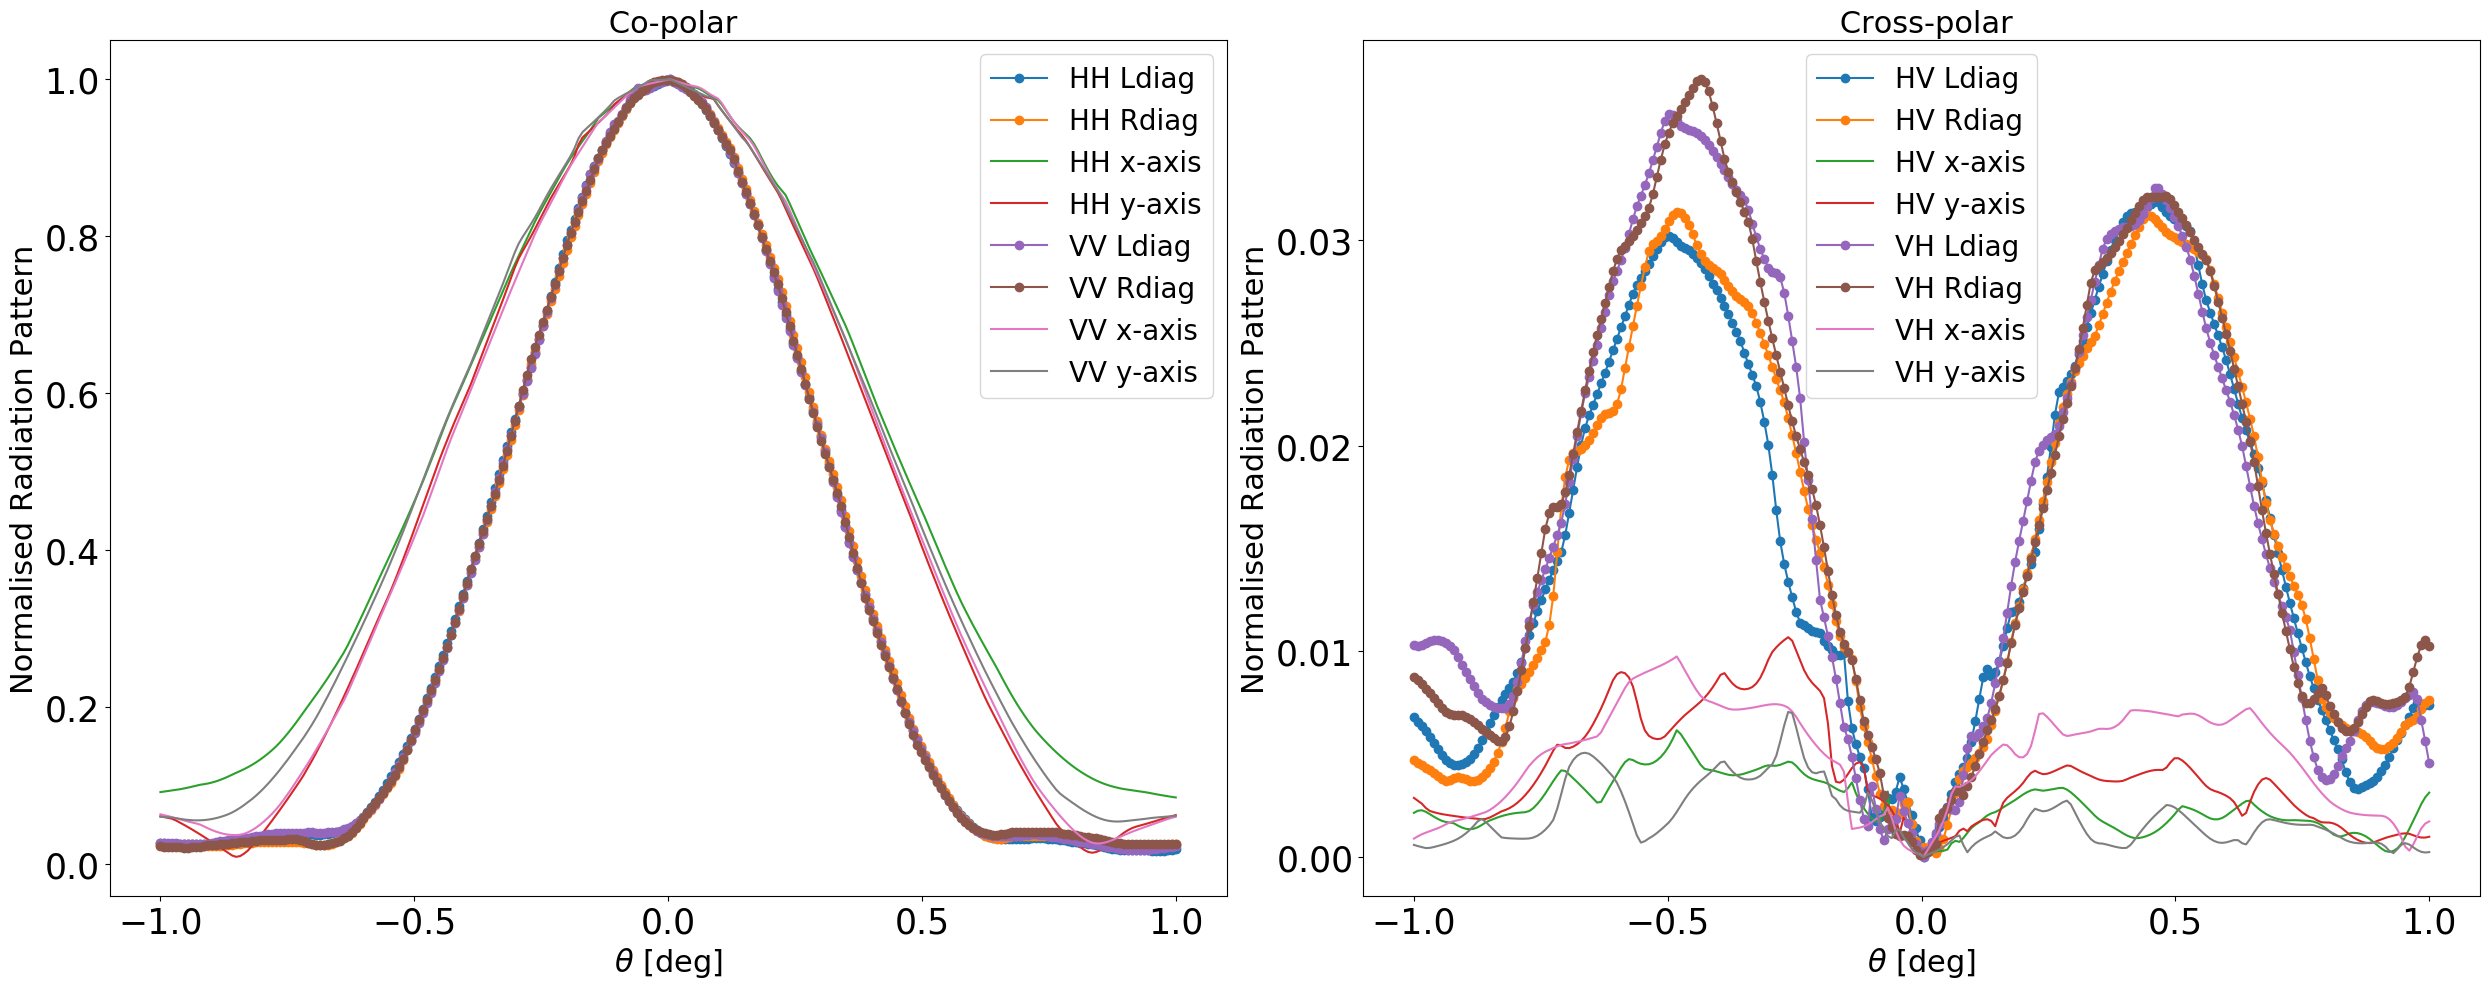

In [63]:
ch = 10
beams = np.zeros((2,2,256,256))
beams[0,0,...] = abs(gdata[ch,0,0,...]) #xx_re[1]
beams[0,1,...] = abs(gdata[ch,0,1,...]) #xy_re[1]
beams[1,0,...] = abs(gdata[ch,1,1,...]) #yx_re[1]
beams[1,1,...] = abs(gdata[ch,1,0,...]) #yy_re[1]


plot_1Dslice(jns_beam=np.nan_to_num(beams), beamsize=2.)